In [37]:
# Provides ways to work with large multidimensional arrays
import numpy as np 
# Allows for further data manipulation and analysis
import pandas as pd

# In Anaconda -> Environments -> Not Installed -> pandas-datareader -> Apply
from pandas_datareader import data as web # Reads stock data 
import matplotlib.pyplot as plt # Plotting
import matplotlib.dates as mdates # Styling dates
%matplotlib inline

# pip install cufflinks -> In Qt Console
import cufflinks as cf
# pip install plotly==5.3.1 -> In Qt Console
import plotly.express as px
import plotly.graph_objects as go

# Make Plotly work in your Jupyter Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Use Plotly locally
cf.go_offline()

import warnings
warnings.simplefilter("ignore")

# pip install yfinance in Qt Console or Powershell Prompt on Windows
import yfinance as yf

from plotly.subplots import make_subplots

In [38]:
# Valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
# Valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
lhv = yf.download(tickers='LHV1T.TL', period='1mo', interval='5m')
lhv

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-01-12 10:00:00+02:00,44.049999,44.049999,44.049999,44.049999,44.049999,0
2022-01-12 10:05:00+02:00,44.150002,44.200001,44.049999,44.200001,44.200001,58
2022-01-12 10:10:00+02:00,44.200001,44.200001,44.200001,44.200001,44.200001,64
2022-01-12 10:15:00+02:00,44.250000,44.299999,44.250000,44.299999,44.299999,75
2022-01-12 10:20:00+02:00,44.250000,44.299999,44.250000,44.299999,44.299999,47
...,...,...,...,...,...,...
2022-02-11 15:30:00+02:00,43.150002,43.150002,43.150002,43.150002,43.150002,140
2022-02-11 15:35:00+02:00,43.200001,43.200001,43.150002,43.150002,43.150002,29
2022-02-11 15:40:00+02:00,43.099998,43.099998,43.099998,43.099998,43.099998,2


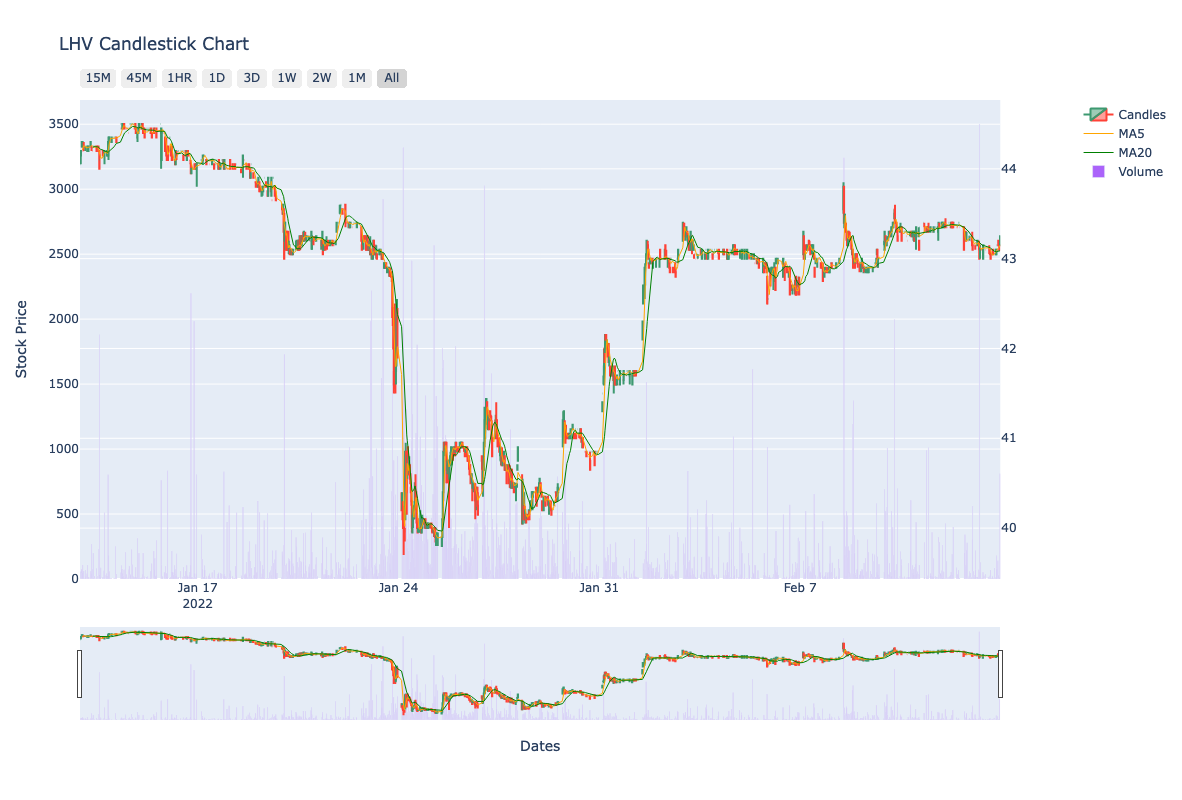

In [39]:
x = lhv.index
close = lhv['Adj Close']
high = lhv['High']
low = lhv['Low']
openp = lhv['Open']

# Calculates 5 and 20 day moving average
# Takes prices and divides them by a defined time period
# Short periods react quickly, while longer react slower to price changes
# They are used to see if a stock is in an uptrend
# If a short term trend is above the longterm that is a sign an uptrend is expected
lhv['MA5'] = msft.Close.rolling(5).mean()
lhv['MA20'] = msft.Close.rolling(20).mean()

# Create candlestick plot
candles = go.Candlestick(x=x, open=openp, high=high,
                         low=low, close=close, name="Candles")

# Create 5 and 20 day moving average
ma5 = go.Scatter(x=lhv.index, y=msft.MA5, 
                 line=dict(color='orange', width=1), name="MA5")
ma20 = go.Scatter(x=lhv.index, y=msft.MA20, 
                  line=dict(color='green', width=1), name="MA20")

# Create volume bar chart
vol = go.Bar(x=lhv.index, y=msft['Volume'], name="Volume")

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add plots
fig.add_trace(trace=candles, secondary_y=True)
fig.add_trace(trace=ma5, secondary_y=True)
fig.add_trace(trace=ma20, secondary_y=True)
fig.add_trace(trace=vol, secondary_y=False)

# Valid Steps : 'month', 'year', 'day', 'hour', 'minute', 'second', 'all'
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=15,
                     label="15M",
                     step="minute",
                     stepmode="backward"),
                dict(count=45,
                     label="45M",
                     step="minute",
                     stepmode="backward"),
                dict(count=1,
                     label="1HR",
                     step="hour",
                     stepmode="todate"),
                dict(count=1,
                     label="1D",
                     step="day",
                     stepmode="todate"),
                dict(count=3,
                     label="3D",
                     step="day",
                     stepmode="todate"),
                dict(count=7,
                     label="1W",
                     step="day",
                     stepmode="backward"),
                dict(count=14,
                     label="2W",
                     step="day",
                     stepmode="backward"),
                dict(count=1,
                     label="1M",
                     step="month",
                     stepmode="backward"),
                dict(label="All", step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)
fig.update_layout(xaxis_title="Dates", yaxis_title="Stock Price", 
                  title="LHV Candlestick Chart", 
                  width=1000, height=800)

# Hides plot between saturday and monday
# Hide hours between 9:30am to 4pm
# Hide specific days like holidays
fig.update_xaxes(
        rangeslider_visible=True,
        rangebreaks=[
            dict(bounds=["sat", "mon"]),
            dict(bounds=[16, 9.5], pattern="hour"), 
            dict(values=["2020-12-25", "2021-01-01", "2021-07-04"])
        ]
    )

fig.show()